In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

# 1. Load the dataset into python environment

In [2]:
data=pd.read_csv(r'C:\Users\sreejayan\Desktop\assignment\titanic_dataset.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2.Make ‘PassengerId’ as the index column

In [4]:
data.set_index('PassengerId', inplace=True)

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [6]:
# Display the first few rows of the dataset
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Get an overview of the dataset, including column names, data types, and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.shape

(891, 11)

# 4.Fill in all the missing values present in all the columns in the dataset:

In [10]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
data['Age'].head(20)

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
11     4.0
12    58.0
13    20.0
14    39.0
15    14.0
16    55.0
17     2.0
18     NaN
19    31.0
20     NaN
Name: Age, dtype: float64

In [12]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
# Fill missing values in numerical columns with the column mean
data.fillna(data.mean(), inplace=True)


In [14]:
# Fill missing values in categorical columns with the most frequent value
data.fillna(data.mode().iloc[0], inplace=True)

In [15]:
data.isna().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [16]:
data.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [17]:
data.fillna(data.mode(), inplace=True)

In [18]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [19]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S


# 5. Check and handle outliers in at least 3 columns in the dataset

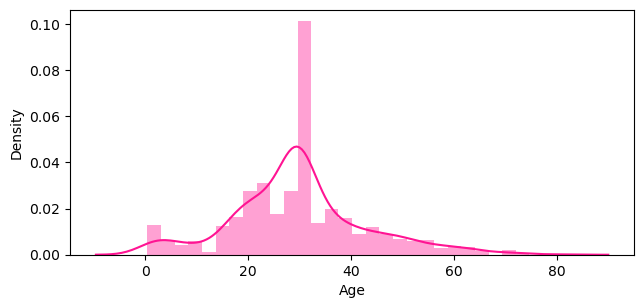

In [27]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(data['Age'],color='DeepPink')

plt.show()

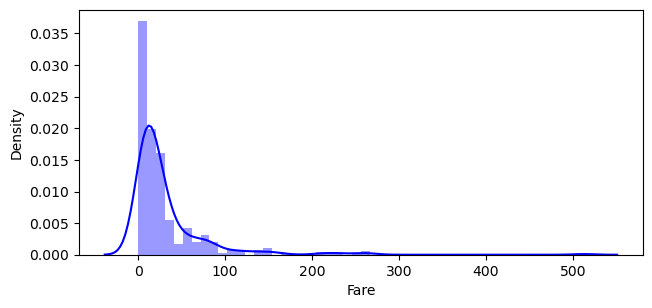

In [29]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(data['Fare'],color='Blue')

plt.show()

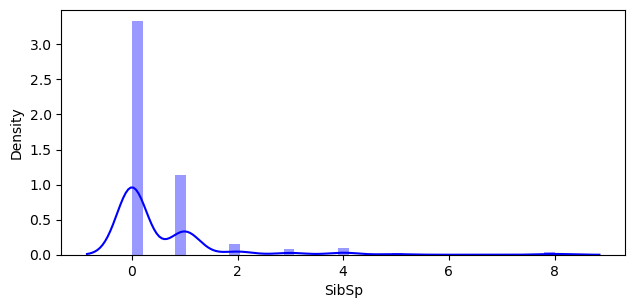

In [30]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(data['SibSp'],color='Blue')

plt.show()

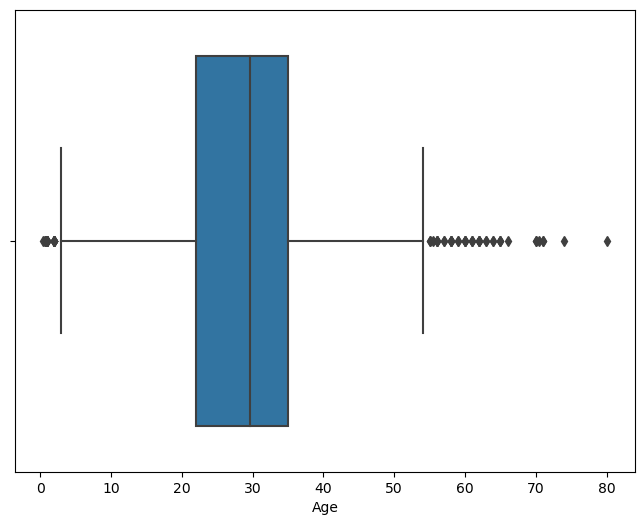

In [32]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=data["Age"])
plt.show()


In [36]:
# Identify outliers using z-score
from scipy import stats
import numpy as np

# Select the columns you want to check for outliers
columns_to_check = ['Age', 'Fare', 'SibSp']

# Calculate z-scores for the selected columns
z_scores = stats.zscore(data[columns_to_check])

# Define a threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Find the indices of outliers
outlier_indices = set()
for i, row in enumerate(z_scores):
    for j, score in enumerate(row):
        if np.abs(score) > threshold:
            outlier_indices.add(i)

# Handle outliers (e.g., replace with NaN or any other desired handling method)
for index in outlier_indices:
    df.loc[index, columns_to_check] = np.nan

# Fill missing values again after handling outliers
df.fillna(data.mean(), inplace=True)

UFuncTypeError: ufunc 'absolute' did not contain a loop with signature matching types <class 'numpy.dtype[str_]'> -> None

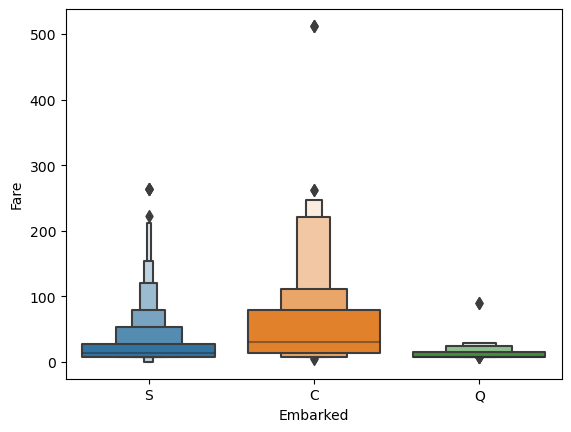

In [37]:
sns.boxenplot(y="Fare", x="Embarked", data=data)
plt.show()

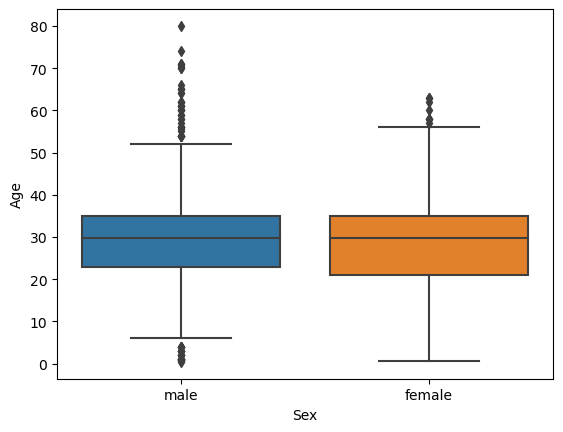

In [39]:
sns.boxplot(x='Sex', y = 'Age',data= data)
plt.show()


In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [47]:
# Separate the features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']
# Apply min-max scaling to the feature set
X_scaled = scaler.fit_transform(X)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [42]:
# Separate the features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Initialize the scaler
scaler = MinMaxScaler()

# Apply min-max scaling to the feature set
X_scaled = scaler.fit_transform(X)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'